# Laboratorio 06: Comparando métodos de clustering

El objetivo de esta tarea es agrupar clientes minoristas en segmentos similares utilizando técnicas de clustering. Utilizaremos el conjunto de datos *Online Retail II*. Puede descargar el conjunto de datos desde este enlace: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

Este conjunto de datos contiene información de transacciones realizadas por una empresa minorista en línea del Reino Unido durante un período de un año. Incluye variables como el número de factura, la fecha de la transacción, la cantidad y el precio unitario de cada artículo comprado, el código del artículo, el nombre del artículo y el código postal del comprador.

Se recomienda revisar la documentación de scikit-learn para clustering antes de comenzar la práctica: https://scikit-learn.org/stable/modules/clustering.html

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Cargar el conjunto de datos y explorarlo para comprender su estructura y características. (2 puntos)

**Recomendación:** El conjunto de datos es grande por lo que se recomienda trabajar con un conjunto parcial de los datos (basta con un 10% y se puede utilizar [train_test_split de Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para obtener una muestra aleatoria estratificada).  

In [6]:
# Cargar el conjunto de datos en un DataFrame de pandas
df = pd.read_excel("online_retail_II.xlsx")

# Ver las primeras filas del DataFrame

# Ver la información general del DataFrame

# Obtener estadísticas descriptivas del DataFrame


In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 2. Preprocesar el conjunto de datos para que sea adecuado para la aplicación de técnicas de clustering. Puede considerar la normalización de los datos y la eliminación de valores faltantes. (2 puntos)

El procedimiento mostrado es una sugerencia, pero puedes tomar otras alternativas. 

In [31]:
# Eliminar las transacciones sin número de factura

# Eliminar las transacciones con valores faltantes
df.dropna()
# Eliminar las transacciones con valores negativos (Quantity, UnitPrice)


# Convertir la columna InvoiceNo en una cadena de caracteres

# Agregar una columna de ingresos totales (Quantity*Price)

# Convertir la columna InvoiceDate en tipo de fecha
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Agregar columnas de año, mes, día y hora
df['Year'] = df['InvoiceDate'].dt.year #Ejemplo para año


# Seleccionar solo las columnas necesarias para el análisis de clustering
#¿Vale la pena incluir columnas no numericas? 
#¿Que información es útil para un modelo de clustering? 
cols = ['Quantity', 'Price']
X = df[cols]

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 3. Aplicar al menos tres técnicas de clustering diferentes a los datos, como KMeans y DBSCAN. Asegúrese de seleccionar el número óptimo de clusters para cada técnica de clustering.(3 puntos)

Algunas de las que estan disponibles en scikit-learn son: 
* [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
* [AffinityPropagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation). 
* [MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift)
* [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
* [OPTICS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
* [BIRCH](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html#sklearn.cluster.Birch)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

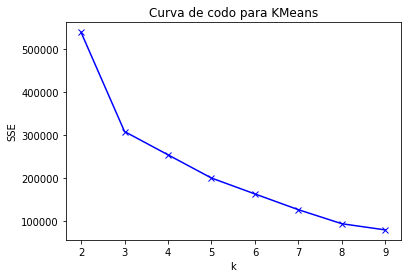

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
#Ejemplo con KMeans 
# Definir una lista de posibles valores de k
k_values = range(2, 10)

# Calcular el SSE (Sum Square Errors) para cada valor de k
#La mayoría de los clasificadores incluyen una métrica interna para mostrar
#se recomienda utilizarla para seleccionar los mejores hiperparametros. 
sse = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(X)
    sse.append(model.inertia_)

# Graficar la curva de codo
plt.plot(k_values, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Curva de codo para KMeans')
plt.show()

# Seleccionar el valor de k óptimo
k_optimo = 4

# Entrenar el modelo con el valor de k óptimo
model = KMeans(n_clusters=k_optimo)
model.fit(X)

# Obtener las etiquetas de clúster para cada muestra
labels = model.labels_

# Obtener los centroides de cada clúster
centroids = model.cluster_centers_

## 4. Evaluar la calidad de los clústeres obtenidos mediante la realización de análisis de silueta, del índice Calinski-Harabaz, y del índice Davies-Bouldin Index. (2 puntos)

* [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)
* [Calinski-Harabaz Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score)
* [Davies-Bouldin Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score)

[0 0 0 ... 0 0 0]


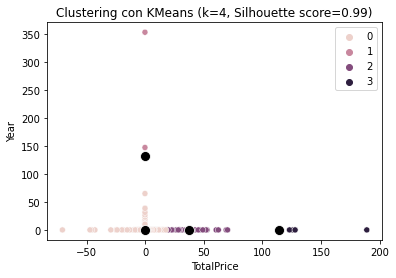

In [33]:
#Ejemplo de análisis de silueta con KMeans
# Calcular el coeficiente de silueta para el modelo KMeans
from sklearn.model_selection import train_test_split
# Dividir los datos en un conjunto de entrenamiento y otro de prueba
silhouette_score_kmeans = silhouette_score(X, labels)
# Graficar los clústeres resultantes del modelo KMeans
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', s=100)
plt.xlabel('TotalPrice')
plt.ylabel('Year')
plt.title(f'Clustering con KMeans (k={k_optimo}, Silhouette score={silhouette_score_kmeans:.2f})')
plt.show()

## 5. Interpretar los clústeres obtenidos y proporcionar recomendaciones basadas en la comprensión de las características de cada grupo de clientes. (2 puntos)

## 6. (Opcional) Visualice los clústeres en un gráfico utilizando técnicas de reducción de dimensionalidad, como PCA o t-SNE. (+2 puntos no acumulable)